# Descriptive Statistics with Pandas

### Prof. Dr.Juanjo Manjarín
**Statistics & Data Analysis**


---

In this document we are going to see how to compute the basic numerical values needed to perform a descriptive analysis of a data set.

We are going to split the document in two main parts:

 * One for **Numerical** variables
 * One for **Categorical** variables
 
most of all because categorical variables are slightly subtle in Python.

## 0.- Packages Needed

In this chunk of code we are going to load all the different packages we need for **all** the analysis to be made

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## 1.- The Data

Let's connect to our drive and load a dataset

In [2]:
from google.colab import drive
drive.mount('mydrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at mydrive


now we can load the dataset

In [3]:
mydf = pd.read_csv("/content/mydrive/My Drive/IE Bootcamp - Math & Stats /data/forestarea.csv")
mydf.head()

,country,continent,forar2013,forar2014,forar2015,avprec2014,anwwith2014
0,Afghanistan,3,2.0678,2.0678,2.0678,327.0,NaN
1,Albania,5,28.2270,28.1920,28.1569,1485.0,NaN
2,Andorra,5,34.0426,34.0426,34.0426,NaN,NaN
3,Argentina,2,10.1238,10.0153,9.9069,591.0,12.9075
4,Armenia,5,11.6473,11.6544,11.6614,562.0,42.8780


This dataset is actual data from the [World Bank Database](https://data.worldbank.org/) corresponding to the different Forest Areas in years 2013 to 2015, the Average Precipitation in 2014 and the Annual Freshwater Withdrawals in 2014. We also have two other variables, one with the names of the countries and another with the continent number following the code

 * 1: Africa
 * 2: America
 * 3: Asia
 * 4: Australia
 * 5: Europe


## 2.- Numerical Data

The descriptive analysis we are going to perform is both: graphical and analytical. For this type of data we are going to use the following information

 * Graphical:
   * Histogram
   * Boxplot
   * Scatterplot
 * Analytical Measures:
   * Central Tendency
     * Mean
     * Median
     * Mode
   * Variability
     * Variance
     * Standard Deviation
     * IQR
   * Shape
     * Skewness
     * Kurtosis
   * Association
     * Covariance
     * Correlation
     
In particular we are going to focus in the `forar2014` variable and we are going to describe it using these different pieces of information

### 2.1.- Graphical Analysis

 Let's begin with the graphical analysis

#### 2.1.1.- Histograms

Remember that the histogram is an approximated description of the variable: along its construction we make different assumptions that will produce different results. 

In Python all these decisions can be left to the compiler by default, as the boundaries of the classes or the number of classes, for example. We can play with all of them but it is usually not recommended.

The following graph shows how different the histogram can be if we choose a different number of classes

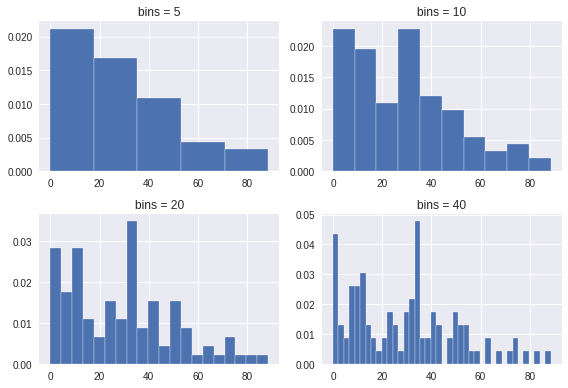

In [0]:
binSet = [5, 10, 20, 40]
coords = [(0,0), (0,1), (1,0), (1,1)]

plt.style.use("seaborn")

for i,j in zip(binSet, coords):
  plt.subplot2grid((2,2),(j[0], j[1]))
  mydf.forar2014.hist(bins = i, ec = "white", density = True)
  plt.title("bins = " + str(i))


plt.tight_layout()
plt.show()

we see that while for n=5 we have a unimodal right-skewed desitribution, for n=10, we may say that the distribution is bimodal, and in fact the value around 35 gains importance in subsequent plots.

The number of bins in matplotlib is found using `numpy.histogram` which sets the number of bins to 10 by default but it also allows for predefined forms, as those of Sturges, Rice or Scott (among others). If we use some of these *optimized* forms we obtain more or less the same structure

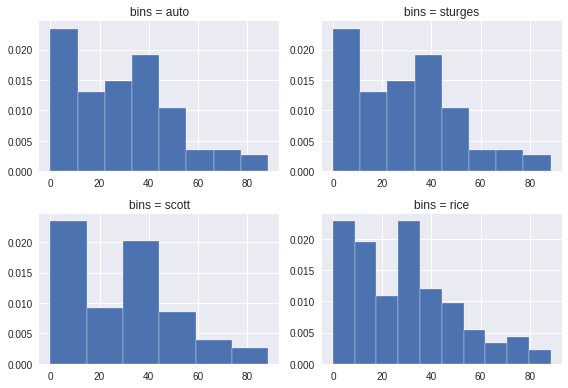

In [0]:
binSet = ["auto", "sturges", "scott", "rice"]
coords = [(0,0), (0,1), (1,0), (1,1)]

plt.style.use("seaborn")

for i,j in zip(binSet, coords):
  plt.subplot2grid((2,2),(j[0], j[1]))
  mydf.forar2014.hist(bins = i, ec = "white", density = True)
  plt.title("bins = " + i)


plt.tight_layout()
plt.show()

#### 2.1.2.- Boxplot

The boxplot, also known as box-and-whiskers plot, is a representation of the robust features of the distribution. In then we see:

 * The **median**, as the line inside the box
 * The **first** and **third quartiles**, as the limits of the box
 * The **Tukey's limits**, as the whiskers (in some cases the whiskers will show the maximum and minimum values of our distribution but this will **not** be our cases)

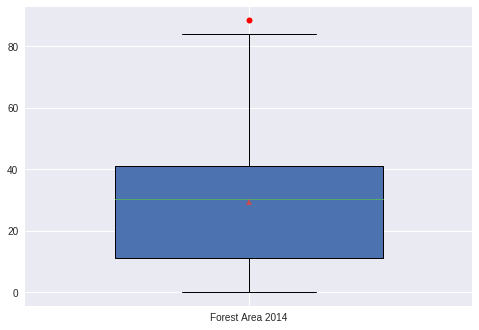

In [0]:
plt.boxplot(mydf.forar2014,
            patch_artist = True,
            showmeans = True,
            widths = 0.6,
            whis = 1.5,
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red'),
            labels = ["Forest Area 2014"])

plt.show()

#### 2.1.3.- Scatterplot

The scatterplot is the representation of a bidimensional distribution, which implies that we need to use two of the variables of the dataset.

Since these plots are mostly used to have a visual inspection of the association and relationship between two variables, when we choose them we must decide which is going to be the dependent and which the independent.

For example, in the following case

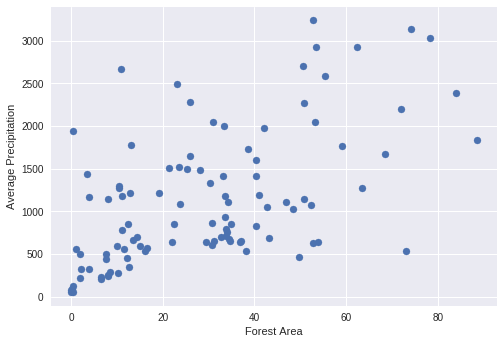

In [0]:
plt.scatter(x = "forar2014", y = "avprec2014", data = mydf)
plt.xlabel("Forest Area")
plt.ylabel("Average Precipitation")

plt.show()

we are explicitely saying that the Average Precipitation depends on the Forest Area and not the other way around.

The way these graphs are read go in three different sides:

 * From the **Association**, where we just see *if* there exists any dependency between both variables. In our case we see that when the forest area increases, the average precipitation increases, so we see a positive association then **covariance** will be different from zero and positive
 * From the **Correlation**, where we measure the strength of the linear association between the variables. In our case, since the points are not too aligned we may expect a positive but weak linear correlation
 * From the **relationship**, where we determine the formal functional form that may relate both variables. In this case a straight line can be used (although it will not be a good description since correlation is weak)
 
There are two quantitites we can find in this context: covariance and correlation. In Python we find them as follows: for the covariance we use the `cov()` function which returns the **covariance matrix**, i.e. one with the following structure

\begin{equation}
\begin{pmatrix} s_x^2 & s_{xy} \\
s_{xy} & s_y^2\end{pmatrix}
\end{equation}

i.e. the diagonal elements of the matrix are the variances of the variables and the off-diagonal are the covariance. Remember that this covariance is given by

\begin{equation}
s_{xy} = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)
\end{equation}


In our case we find

In [0]:
mydf[["forar2014","avprec2014"]].cov()

,forar2014,avprec2014
forar2014,454.730212,9615.444872
avprec2014,9615.444872,612802.889245


we see that covariance is 9615.44. Remember that the magnitude of the covariance is not relevant, so this values does not imply that there is a high association.

To find the correlation we use the `corr()` function which returns rhe **correlation matrix**, which has the structure

\begin{equation}
\begin{pmatrix} 1 & r \\
r & 1\end{pmatrix}
\end{equation}

i.e. its diagonal elements are always 1 and the off-diagonal are the linear correlation of the corresponding variables, shich is given by

\begin{equation}
r = \frac{s_{xy}}{s_x\cdot s_y}
\end{equation}

Let's see it

In [0]:
mydf[["forar2014","avprec2014"]].corr()

,forar2014,avprec2014
forar2014,1.000000,0.570544
avprec2014,0.570544,1.000000


remember that the strength is actually measured using $r^2$, then 

In [0]:
mydf[["forar2014","avprec2014"]].corr()**2

,forar2014,avprec2014
forar2014,1.00000,0.32552
avprec2014,0.32552,1.00000


we see a correlation of 0.3255 which is, as expected, a weak one.

### 2.2.- Analytical Measures

Let's see how to use methods in the pandas dataframe to obtain all the different quantities. In general we can use the `describe()` method to find most of them

In [0]:
mydf["forar2014"].describe()

count    104.000000
mean      29.400958
std       21.324404
min        0.000000
25%       11.023700
50%       30.496500
75%       41.210475
max       88.485300
Name: forar2014, dtype: float64

or, if we want to find these summaries by continents we can use the `groupby()` function

In [0]:
mydf.groupby("continent")["forar2014"].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
1,27.0,24.562404,22.737033,0.0727,8.143100,12.6372,38.713750,88.4853
2,22.0,37.993132,19.601866,3.5486,26.969525,36.0955,52.274075,84.0030
3,22.0,23.174777,23.799834,0.0000,3.191975,14.2510,38.468875,72.0154
4,4.0,47.106750,26.256087,16.1987,32.965625,46.9823,61.123425,78.2637
5,29.0,29.668748,15.809847,0.4778,16.632800,31.2164,34.764600,73.1120


which returns a dataframe with indexes given by the continent variable (do not confuse the fact that it begins by 1 because it is Africa with the 0-based index)

#### 2.2.1.- Central Tendency

Roughly speaking we can say that these are the measures around which we should describe the distribution. However, not all of them are relevant in all the situations and, in fact, some should not be used in others.

##### 2.2.1.1.- Mean

Or, to be more precise, the **arithmetic mean**. This is the usual average on a set of independent values

\begin{equation}
\bar x = \frac{1}{n}\sum_{i=1}^n x_i
\end{equation}

which can be written in terms of the total and/or relative frequencies. 

In Python we will just use the method `mean()` directly over the dataframe (or any subset of it), then

In [0]:
forar_mean = mydf["forar2014"].mean()
forar_mean 

29.40095769230768

We must be careful with the mean since, despite its great mathematical properties, it has some big drawbacks that can make it not recommended, irrelevant or even useless to describe the distribution. Cases are:

 * Presence of outliers in the distribution
 * Not unimodal distribution
 * Asymmetric distribution
 
in countinuous distributions the problem with the outliers can be so deep as to render the mean inexistent (and the standard deviation and any other moments of the distribution)

##### 2.2.1.2.- Median

The median is, by definition, the midpoint of the distribution then it is a more robust measure against most of the problems of the mean. However, the mathematical properties of the median are not so nice and its treatment becomes less straightforward.

To find it in Python we use the `median()` method of the pandas dataframe, then

In [0]:
forar_med = mydf["forar2014"].median()
forar_med

30.4965

Note that, just as the mean, the median may not be an actual number in the distribution of values. This will depend on whether the number of observations is even or odd. To find it in general cases we first need to locate its position in a reordered from low to high set, then we determine its value.

Let's see this with a small example

In [0]:
random.seed(101)
example = np.random.randint(1, 20, 13)
example

array([18,  2, 13, 13,  5, 14,  5,  5,  5,  5, 10, 10, 16])

once we have the data, we determine the location o the median

In [0]:
if len(example) % 2 == 0:
  med_pos = int(len(example)/2) + 0.5
else:
  med_pos = int((len(example) - 1)/2) + 1

print("The location of the median is the in the " + str(med_pos) + "th observation")

The location of the median is the in the 7th observation


now we must reorder from low to high

In [0]:
ord_ex = np.sort(example)
ord_ex

array([ 2,  5,  5,  5,  5,  5, 10, 10, 13, 13, 14, 16, 18])

and now we can find the value of the median

In [0]:
if len(example) % 2 == 0:
  ex_median = (ord_ex[int(np.ceil(med_pos)) - 1] + ord_ex[int(np.floor(med_pos)) - 1])/2
else:
  ex_median = ord_ex[int(np.floor(med_pos)) - 1]

print("The median is " + str(ex_median))

The median is 10


##### 2.2.1.3.- Mode

The mode is the most common observation and it may or may no extist. We say that it does not exist when all the observations have the same frequency. In other cases we can find **unimodal**, **bimodal**, **trimodal**,... Distributions.

The function the find this in Python is `mode()`. In our case it will return all the values of the distribution (check it!), a common situation for continuous variables. However, we can use the example data set for the median and see

In [0]:
pd.DataFrame(example).mode()

,0
0,5


#### 2.2.2.- Variability Measures

Let's now see how to evaluate the *spreading* of the values. We are going to use two main quantitites:

 * The **standard deviation** if the relevant central tendency is the mean
 * The **IQR** if the relevant central tendency is the median

##### 2.2.2.1.- Standard Deviation

The standard deviation is defined as the square root of the quasi-variance (the actual difference bewteen variance and quasi-variance will only be clear once we see estimation theory so by now it remains as just a definition). It is defined in a sample as

\begin{equation}
s_x = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar x)^2}
\end{equation}

then it can be seen as the average distance to the mean. In symmetric distributions it denotes the distances from the mean value (both sides) where we will find most of the values of the distribution.

In Python we use the `std()` function to find it

In [0]:
forar_sd = mydf["forar2014"].std()
forar_sd

21.324404147988194

##### 2.2.2.2.- IQR

The Interquartile Range is the distance from the first to the third quartile of the distribution. It represents the range where we can find the middle 50% of the values of the distribution.

To compute it we follow

\begin{equation}
IQR = Q_3 - Q_1
\end{equation}

then we may just find the corresponding quartiles (or percentiles) and substract them

In [0]:
forar_iqr = mydf["forar2014"].quantile(0.75) - mydf["forar2014"].quantile(0.25)
forar_iqr

30.186775000000004

Since we have not seen the **scipy** package, we are not using it yet. However, let's mention that there is an `iqr()` function in it that can be used to obtain the same result

In [0]:
import scipy.stats as ss
ss.iqr(mydf["forar2014"])

30.186775000000004

#### 2.2.3.- Shape Measures

As we know, the central tendency and variability measures are definitely not enough since the same values may correspond to completely different distributions

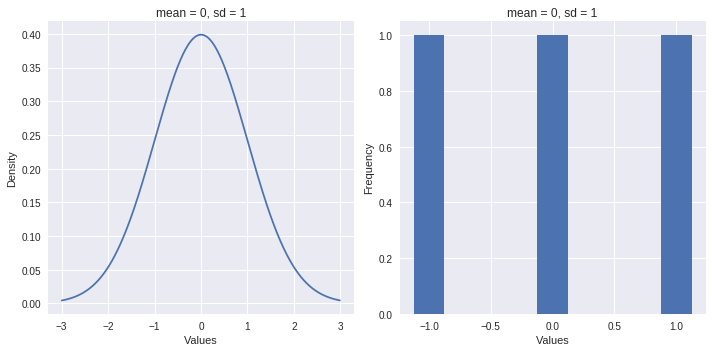

In [0]:
from scipy.stats import norm
x1 = np.arange(-3, 3, 0.01)
y1 = norm(0,1).pdf(x1)

x2 = np.array([-1, 0, 1])
y2 = np.array([1, 1 , 1])


plt.figure(figsize = (10,5))

plt.subplot(121)
_ = plt.plot(x1, y1)
_ = plt.xlabel("Values")
_ = plt.ylabel("Density")
_ = plt.title("mean = 0, sd = 1")

plt.subplot(122)
_ = plt.bar(x2, y2, width = 0.25)
_ = plt.xlabel("Values")
_ = plt.ylabel("Frequency")
_ = plt.title("mean = 0, sd = 1")

plt.tight_layout()
plt.show()

It is clear that we need other quantities to determine how the distribution is. These are the shape measures, in particular we will see

 * The **skewness**, which lets us find if there is contribution from long tails to one of the sides of the mean, then
 
 
|      <0     |     0     |      >0      |
|-------------|-----------|--------------|
| left-skewed | symmetric | right-skewed |
 

where *left-skewed* means that there is a tail to the left of the mean and the same interpretation for the right side.
 
 * The **kurtosis**, which tells us how heavy are the tails of the distribution, i.e. if there is a significant number of outliers. We do not compute this as an absolute value, but compared to the normal distribution, then 
 
|      <0     |     0    |     >0      |
|-------------|----------|-------------|
| light-tails | no-tails | heavy-tails |
 
where *no-tails* means "same tails as the normal distribution", i.e. a normal number of outliers.

To find the skewness we use the `skew()` function as

In [0]:
forar_skew = mydf["forar2014"].skew()
forar_skew

0.6138969068308731

while for the kurtosis we use the `kurt()` function

In [0]:
forar_kurto = mydf["forar2014"].kurt()
forar_kurto

-0.18967214906115304

### Summary

Let's make a brief summary of the values we have found

In [0]:
print("The MEAN value is " + str(round(forar_mean, 2)))
print("The MEDIAN value is " + str(round(forar_med, 2)))
print("The STANDARD DEVIATION value is " + str(round(forar_sd, 2)))
print("The IQR value is " + str(round(forar_iqr, 2)))
print("The SKEWNESS value is " + str(round(forar_skew, 2)))
print("The KURTOSIS value is " + str(round(forar_kurto, 2)))

The MEAN value is 29.4
The MEDIAN value is 30.5
The STANDARD DEVIATION value is 21.32
The IQR value is 30.19
The SKEWNESS value is 0.61
The KURTOSIS value is -0.19


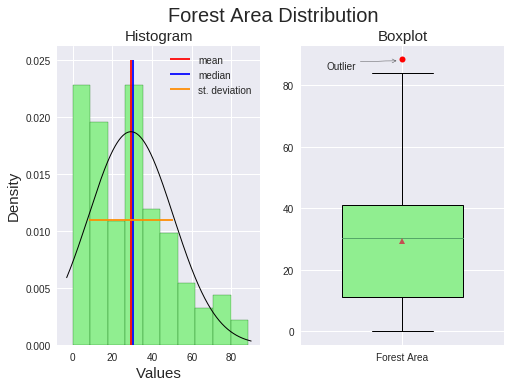

In [0]:
plt.suptitle("Forest Area Distribution", fontsize = 20)

plt.subplot2grid((1,2), (0,0))
plt.hist(mydf["forar2014"],
         color = "lightgreen",
         ec = "darkgreen",
         density = True)

plt.plot(np.arange(-3, 90, 0.01),
         norm.pdf(np.arange(-3, 90, 0.01),
                  forar_mean,
                  forar_sd),
         color = "Black",
         lw = 1)
plt.vlines(x=forar_mean, ymin=0, ymax= 0.025, label="mean", color="red")
plt.vlines(x=forar_med, ymin=0, ymax= 0.025, label="median", color="blue")
plt.hlines(xmin = forar_mean - forar_sd, 
           xmax= forar_mean + forar_sd,
           y = 0.011,
           label="st. deviation", color="darkorange")

plt.title("Histogram", fontsize = 15)
plt.xlabel("Values", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.legend(loc = "best")

plt.subplot2grid((1,2), (0,1))
plt.boxplot(mydf["forar2014"],
            patch_artist = True,
            showmeans = True,
            widths = 0.6,
            whis = 1.5,
            labels = ["Forest Area"],
            boxprops = dict(facecolor = "lightgreen"),
            flierprops = dict(marker = 'o',
                              markerfacecolor = 'red'))
plt.title("Boxplot", fontsize = 15)

plt.annotate("Outlier", xytext = (0.7, 88), xy = (0.98, 88), 
             ha = "center", 
             va = "top", 
            arrowprops= dict(arrowstyle = "->", 
                             connectionstyle = "angle3", 
                             color = "black" ))

plt.show()


---

Given this summary, answer the following questions

 1.- From both, the numerical value and the graphs, describe the skewness of the distribution
 
 2.- From both, the numerical value and the graphs, interpret the value of the kurtosis
 
 3.- Which central tendency measure would you use to describe the distribution? Why?
 
 4.- Which variability measure would you use to describe the distribution? Why?
 
 5.- Explain the outliers of the distribution
 
 6.- Considering that the variable we are using is the forest area in different countries around the world, describe it using the previous information.

---



## 3.- Categorical Variables

The main point we must keep in mind when we work with categorical variables is that we cannot compute usual values as mean or standard deviation since it does not make any sense: think of the mean hair color in a group of people...

This seems to confuse some people when we work with categorical variables which have been transformed into numbers, either for conveniences as when we assign (0,1) to a (head, tails) flip of a coin or when there exists a natural ordering as a ranking or a questionnaire ranging from 1 to 5. When in doubt, try to make sense of the difference between two of the values in different positions: we can substract 5 and 3 or 10 and 8 and we obtain a number meaning exactly the same. If you do this same in the questionnaire you will see that it does not have any meaning.

There is, however, one quantitiy we may still find for these categorical variables: the frequency, which at the end will become the **proportion**.

Now, in Python there is no native way of working with categories since there is no such data type. However, pandas introduces it and we are going to see how to work with it (a bit) here. 

There are different approaches here, but we can use the `Categorical()` function to generate a pandas series of categorical nature

In [0]:
pd.Categorical(["yes", "no", "no", "yes", "yes"], categories = ["yes", "no"])

[yes, no, no, yes, yes]
Categories (2, object): [yes, no]

Let's now create a random dataset with a set of binary variables

In [0]:
random.seed(101)
catdf = pd.DataFrame({"married": pd.Categorical(np.random.randint(0,2,100)),
                      "siblings": pd.Categorical(np.random.randint(0,2,100)),
                      "female": pd.Categorical(np.random.randint(0,2,100))})
catdf.head()

,married,siblings,female
0,0,0,0
1,1,1,0
2,0,0,1
3,0,1,1
4,0,1,1


As expected, if we use the `describe()` function here, we will find that there is nothing similar to the output we obtained with numerical variables (to actually compare, drop the pd.Categorical and see the output) 

In [0]:
catdf.describe()

,married,siblings,female
count,100,100,100
unique,2,2,2
top,0,0,1
freq,53,51,59


the most we get are the frequencies of the most repeated category. In this case it is useful because we only have two of them, but with 3 or more, this values is not meaningful.

If we want an individual summary we need the `value_counts()` method

In [0]:
catdf["married"].value_counts()

0    53
1    47
Name: married, dtype: int64

### 3.1.- Contingency Tables

When we have more than one categorical variable and we want to summarize the frequencies of the observations fitting into all the possible combinations of categories we need a **contingency table**. 

In pandas we have the `crosstab()` function that finds these tables, for example, the contingency table of `female` and `married` variables is

In [0]:
pd.crosstab(catdf.female, catdf.married)

married,0,1
female,,
0,21,20
1,32,27


which means that there are 23 people in the sample which are not-female and not-married, and so on.

If we need this table in proportions, we have the `normalize` argument that let's us find the corresponding table

In [0]:
pd.crosstab(catdf.female, catdf.married, normalize = True)

married,0,1
female,,
0,0.21,0.20
1,0.32,0.27


Since the output of this function is a pandas data frame, we can use all the methods of this class, in particular we can plot it directly


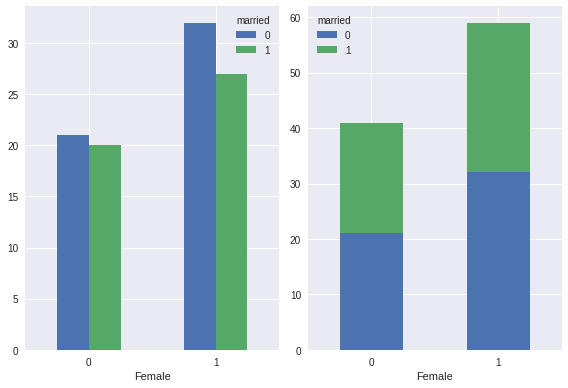

In [0]:
labels = [0, 1]

fig, axes = plt.subplots(nrows=1, ncols=2)

pd.crosstab(catdf.female, catdf.married).plot(kind = "bar", ax = axes[0])
axes[0].set_xticklabels(labels, rotation = 0)
axes[0].set_xlabel("Female")

pd.crosstab(catdf.female, catdf.married).plot(kind = "bar", ax = axes[1], stacked = True)
axes[1].set_xticklabels(labels, rotation = 0)
axes[1].set_xlabel("Female")

plt.tight_layout()
plt.show()

In many situations we will find that we have more than one categorical variable and we want to find all the crossed frequencies, the procedure is exactly the same but passing a list as the set of classifiers, then

In [0]:
pd.crosstab(catdf.female, [catdf.married, catdf.siblings])

married    0       1    
siblings   0   1   0   1
female                  
0         13   8   9  11
1         14  18  15  12

so the 17 means that there are 17 people in this sample who are female, are married and have siblings.

Just as before, we can plot this contingency table directly using the dataframe methods

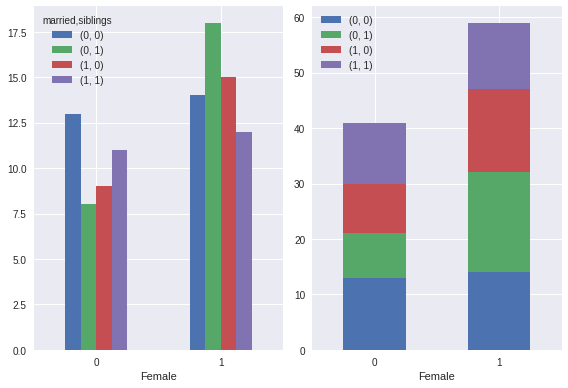

In [0]:
labels = [0, 1]

fig, axes = plt.subplots(nrows=1, ncols=2)

pd.crosstab(catdf.female, [catdf.married, catdf.siblings]).plot(kind = "bar", ax = axes[0])
axes[0].set_xticklabels(labels, rotation = 0)
axes[0].set_xlabel("Female")

pd.crosstab(catdf.female, [catdf.married, catdf.siblings]).plot(kind = "bar", ax = axes[1], stacked = True)
axes[1].set_xticklabels(labels, rotation = 0)
axes[1].set_xlabel("Female")
axes[1].legend(loc = "best")

plt.tight_layout()
plt.show()